In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mango-leaves/test/Powdery Mildew/IMG_20211107_130039 (Custom).jpg
/kaggle/input/mango-leaves/test/Powdery Mildew/IMG_20211107_125833 (Custom).jpg
/kaggle/input/mango-leaves/test/Powdery Mildew/IMG_20211107_125842 (Custom).jpg
/kaggle/input/mango-leaves/test/Powdery Mildew/IMG_20211107_130121 (Custom).jpg
/kaggle/input/mango-leaves/test/Powdery Mildew/IMG_20211107_130157 (Custom).jpg
/kaggle/input/mango-leaves/test/Powdery Mildew/IMG_20211107_125922 (Custom).jpg
/kaggle/input/mango-leaves/test/Powdery Mildew/IMG_20211107_130152 (Custom).jpg
/kaggle/input/mango-leaves/test/Powdery Mildew/IMG_20211107_130258 (Custom).jpg
/kaggle/input/mango-leaves/test/Powdery Mildew/IMG_20211107_125836 (Custom).jpg
/kaggle/input/mango-leaves/test/Powdery Mildew/IMG_20211107_125935 (Custom).jpg
/kaggle/input/mango-leaves/test/Powdery Mildew/IMG_20211107_143716 (Custom).jpg
/kaggle/input/mango-leaves/test/Powdery Mildew/IMG_20211107_130050 (Custom).jpg
/kaggle/input/mango-leaves/test/Powdery 

Importing files and Understanding the Image Dataset

* Displaying a Sample Image

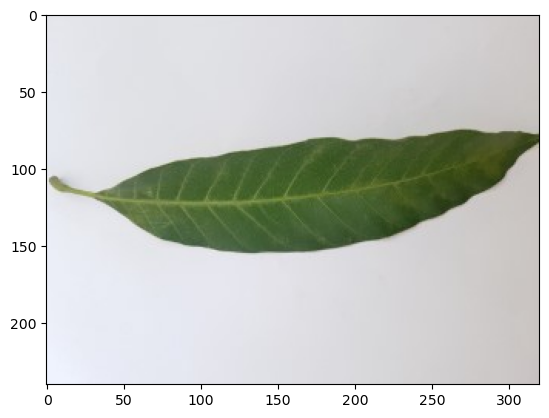

In [2]:
import matplotlib.pyplot as plt
image1=plt.imread('/kaggle/input/mango-leaves/train/Healthy/20211231_124331 (Custom).jpg')
plt.imshow(image1)

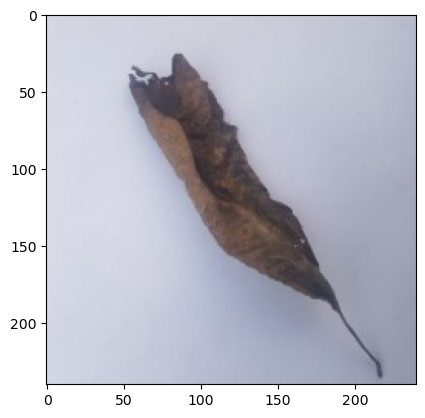

In [3]:
image2=plt.imread('/kaggle/input/mango-leaves/train/Die Back/20211129_164502 (Custom).jpg')
plt.imshow(image2)

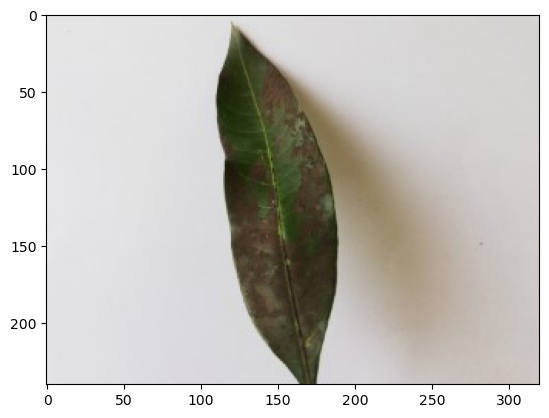

In [4]:
image3=plt.imread('/kaggle/input/mango-leaves/train/Sooty Mould/IMG_20211212_144846 (Custom).jpg')
plt.imshow(image3)

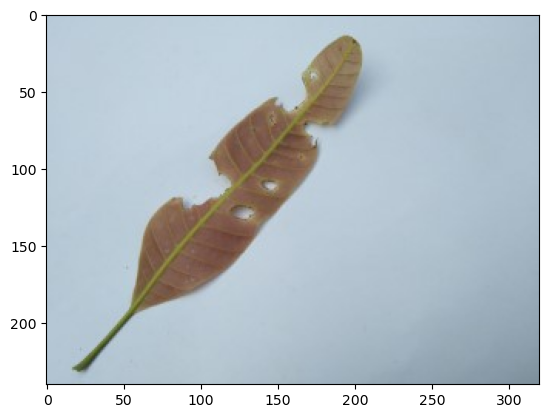

In [5]:
image4=plt.imread('/kaggle/input/mango-leaves/train/Anthracnose/IMG_20211011_153406 (Custom).jpg')
plt.imshow(image4)

Image Preprocessing and Implementation of Training and Validation Sets

* Importing Libraries

In [6]:
import keras
from keras.preprocessing.image import ImageDataGenerator

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

* Augmentation Parameter Setup

In [7]:
height=299
width=299
batch_size=32
epochs=100

rs=1./255
rr=5
zr=0.1
sr=0.1
hsr=0.1
wsr=0.1
hf=True
vf=False
s=False

X_train_length=len(os.listdir('/kaggle/input/mango-leaves/train/Anthracnose'))+len(os.listdir('/kaggle/input/mango-leaves/train/Bacterial Canker'))+len(os.listdir('/kaggle/input/mango-leaves/train/Cutting Weevil'))+len(os.listdir('/kaggle/input/mango-leaves/train/Die Back'))+len(os.listdir('/kaggle/input/mango-leaves/train/Gall Midge'))+len(os.listdir('/kaggle/input/mango-leaves/train/Healthy'))+len(os.listdir('/kaggle/input/mango-leaves/train/Powdery Mildew'))+len(os.listdir('/kaggle/input/mango-leaves/train/Sooty Mould'))
X_test_length=len(os.listdir('/kaggle/input/mango-leaves/test/Anthracnose'))+len(os.listdir('/kaggle/input/mango-leaves/test/Bacterial Canker'))+len(os.listdir('/kaggle/input/mango-leaves/test/Cutting Weevil'))+len(os.listdir('/kaggle/input/mango-leaves/test/Die Back'))+len(os.listdir('/kaggle/input/mango-leaves/test/Gall Midge'))+len(os.listdir('/kaggle/input/mango-leaves/test/Healthy'))+len(os.listdir('/kaggle/input/mango-leaves/test/Powdery Mildew'))+len(os.listdir('/kaggle/input/mango-leaves/test/Sooty Mould'))

training_steps=X_train_length//batch_size
test_steps=X_test_length//batch_size

* Labling

In [8]:
import numpy as np
y_train_labels=[]
y_test_labels=[]

for i in range(0,len(os.listdir('/kaggle/input/mango-leaves/train/Anthracnose'))):
    y_train_labels.append('Anthracnose')
for j in range(0,len(os.listdir('/kaggle/input/mango-leaves/train/Bacterial Canker'))):
    y_train_labels.append('Bacterial Canker')
for k in range(0,len(os.listdir('/kaggle/input/mango-leaves/train/Cutting Weevil'))):
    y_train_labels.append('Cutting Weevil')              
for l in range(0,len(os.listdir('/kaggle/input/mango-leaves/train/Die Back'))):
    y_train_labels.append('Die Back')
for m in range(0,len(os.listdir('/kaggle/input/mango-leaves/train/Gall Midge'))):
    y_train_labels.append('Gall Midge')
for n in range(0,len(os.listdir('/kaggle/input/mango-leaves/train/Powdery Mildew'))):
    y_train_labels.append('Powdery Mildew')
for o in range(0,len(os.listdir('/kaggle/input/mango-leaves/train/Healthy'))):
    y_train_labels.append('Healthy')              
for p in range(0,len(os.listdir('/kaggle/input/mango-leaves/train/Sooty Mould'))):
    y_train_labels.append('Sooty Mould')
    
for i in range(0,len(os.listdir('/kaggle/input/mango-leaves/test/Anthracnose'))):
    y_test_labels.append('Anthracnose')
for j in range(0,len(os.listdir('/kaggle/input/mango-leaves/test/Bacterial Canker'))):
    y_test_labels.append('Bacterial Canker')
for k in range(0,len(os.listdir('/kaggle/input/mango-leaves/test/Cutting Weevil'))):
    y_test_labels.append('Cutting Weevil')              
for l in range(0,len(os.listdir('/kaggle/input/mango-leaves/test/Die Back'))):
    y_test_labels.append('Die Back')
for m in range(0,len(os.listdir('/kaggle/input/mango-leaves/test/Gall Midge'))):
    y_test_labels.append('Gall Midge')
for n in range(0,len(os.listdir('/kaggle/input/mango-leaves/test/Powdery Mildew'))):
    y_test_labels.append('Powdery Mildew')
for o in range(0,len(os.listdir('/kaggle/input/mango-leaves/test/Healthy'))):
    y_test_labels.append('Healthy')              
for p in range(0,len(os.listdir('/kaggle/input/mango-leaves/test/Sooty Mould'))):
    y_test_labels.append('Sooty Mould')
    

    
y_train_raw=np.array( y_train_labels)
y_test_raw=np.array(y_test_labels)

* Creating Training set and Test set with Image Preprocessing

In [9]:
train_augmentation=ImageDataGenerator(rescale=rs,rotation_range=rr,zoom_range=zr,shear_range=sr,height_shift_range=hsr,width_shift_range=wsr,horizontal_flip=hf,vertical_flip=vf)
test_augmentation=ImageDataGenerator(rescale=rs)

X_train_images=train_augmentation.flow_from_directory('/kaggle/input/mango-leaves/train/',target_size=(height,width),batch_size=batch_size,class_mode='categorical',shuffle=s)
X_test_images=test_augmentation.flow_from_directory('/kaggle/input/mango-leaves/test/',target_size=(height,width),batch_size=batch_size,class_mode='categorical',shuffle=s)

X_train=np.concatenate([X_train_images.next()[0] for i in range(X_train_images.__len__())])
X_test=np.concatenate([X_test_images.next()[0] for i in range(X_test_images.__len__())])

Found 3600 images belonging to 8 classes.
Found 400 images belonging to 8 classes.


* Shuffling the Data

In [10]:
from sklearn.utils import shuffle
X_train, y_train_raw = shuffle(X_train, y_train_raw, random_state=0)
X_test, y_test_raw = shuffle(X_test, y_test_raw, random_state=0)

* Encoding the Labels

In [11]:
import pandas as pd
y_train = pd.get_dummies(y_train_raw)
y_test = pd.get_dummies(y_test_raw)

Getting the Pre-Trained Model 

In [12]:
import tensorflow
tensorflow.keras.applications.xception.preprocess_input
pre_trained_model=tensorflow.keras.applications.Xception(input_shape=(height,width,3),include_top=False,weights='imagenet')
for layer in pre_trained_model.layers:
    layer.trainable=False

83683744/83683744 [==============================] - 0s 0us/step


Finding the best CNN Model using Keras Tuner

* Installing Kears Tuner

In [13]:
!pip install keras-tuner

* Importing Libraries

In [14]:
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout,BatchNormalization,GlobalAveragePooling2D,AveragePooling2D
from keras.regularizers import l1,l2
from keras.models import Model

* Creating Function for Hyper Parameter Tuning

In [15]:
def build_model(hp):
   model = pre_trained_model.output
   #model = keras.layers.Conv2D(filters=hp.Int('conv_1_filter',min_value=16,max_value=512,step=16),kernel_size=hp.Choice('conv_1_kernel',values = [3,5]),padding=hp.Choice('conv_1_padding',values=['same','valid']),activation='relu')(model)
   #model = keras.layers.AveragePooling2D(pool_size=hp.Choice('avergae_1_pool',values = [2,3]),padding=hp.Choice('average_1_padding',values=['same','valid']))(model)
   model = GlobalAveragePooling2D()(model)
   model = keras.layers.Dropout(rate=hp.Float('dropout_1_rate',min_value=0.1,max_value=0.9,step=0.1))(model)
   #model = keras.layers.BatchNormalization()(model)
   #model = keras.layers.Conv2D(filters=hp.Int('conv_2_filter',min_value=16,max_value=512,step=16),kernel_size=hp.Choice('conv_2_kernel',values = [3,5]),padding=hp.Choice('conv_2_padding',values=['same','valid']),activation='relu')(model)
   #model = keras.layers.AveragePooling2D(pool_size=hp.Choice('average_2_pool',values = [2,3]),padding=hp.Choice('average_2_padding',values=['same','valid']))(model)
   #model = keras.layers.BatchNormalization()(model)
                            #keras.layers.Conv2D(filters=hp.Int('conv_3_filter',min_value=16,max_value=512,step=16),kernel_size=hp.Choice('conv_3_kernel',values = [3,5]),padding=hp.Choice('conv_3_padding',values=['same','valid']),activation='relu'),
                            #keras.layers.MaxPooling2D(pool_size=hp.Choice('maxpool_3_pool',values = [2,3]),padding=hp.Choice('maxpool_3_padding',values=['same','valid']))
                            #keras.layers.Dropout(rate=hp.Float('dropout_3_rate',min_value=0.1,max_value=0.9,step=0.05))
                            #keras.layers.BatchNormalization()
                        
                            #keras.layers.Conv2D(filters=hp.Int('conv_4_filter',min_value=16,max_value=512,step=16),kernel_size=hp.Choice('conv_4_kernel',values = [3,5]),padding=hp.Choice('conv_4_padding',values=['same','valid']),activation='relu'),
                            #keras.layers.MaxPooling2D(pool_size=hp.Choice('maxpool_4_pool',values = [2,3]),padding=hp.Choice('maxpool_4_padding',values=['same','valid']))
                            #keras.layers.Dropout(rate=hp.Float('dropout_4_rate',min_value=0.1,max_value=0.9,step=0.05)),
                            #keras.layers.BatchNormalization()


                            #keras.layers.Conv2D(filters=hp.Int('conv_5_filter',min_value=16,max_value=512,step=16),kernel_size=hp.Choice('conv_5_kernel',values = [3,5]),padding=hp.Choice('conv_5_padding',values=['same','valid']),activation='relu'),
                            #keras.layers.MaxPooling2D(pool_size=hp.Choice('maxpool_5_pool',values = [2,3]),padding=hp.Choice('maxpool_5_padding',values=['same','valid']))
                            #keras.layers.Dropout(rate=hp.Float('dropout_5_rate',min_value=0.1,max_value=0.9,step=0.05))
                            #keras.layers.BatchNormalization()

   #model = keras.layers.Flatten()(model)

   model = keras.layers.Dense(units=hp.Int('dense_1_units',min_value=8,max_value=1024,step=8),activation=hp.Choice('dense_1_activation',values=['relu', 'elu', 'selu']),kernel_initializer=hp.Choice('dense_1_kernel_initializer',values=['random_normal','glorot_normal', 'he_normal', 'glorot_uniform']))(model)

   model = keras.layers.Dropout(rate=hp.Float('dropout_2_rate',min_value=0.1,max_value=0.9,step=0.05))(model)

   model = keras.layers.Dense(units=hp.Int('dense_2_units',min_value=8,max_value=1024,step=8),activation=hp.Choice('dense_2_activation',values=['relu', 'elu', 'selu']),kernel_initializer=hp.Choice('dense_2_kernel_initializer',values=['random_normal','glorot_normal', 'he_normal', 'glorot_uniform']))(model)

   model = keras.layers.Dropout(rate=hp.Float('dropout_3_rate',min_value=0.1,max_value=0.9,step=0.05))(model)

   model = keras.layers.Dense(units=hp.Int('dense_3_units',min_value=8,max_value=1024,step=8),activation=hp.Choice('dense_3_activation',values=['relu', 'elu', 'selu']),kernel_initializer=hp.Choice('dense_3_kernel_initializer',values=['random_normal','glorot_normal', 'he_normal', 'glorot_uniform']))(model)

   prediction =  keras.layers.Dense(8,activation='softmax')(model)

   model = Model(pre_trained_model.input, prediction)

   model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate',values=[1e-2, 1e-3])),
                                          loss='categorical_crossentropy',
                                          metrics=['accuracy'])

   return model

* Finding the Best Fit

In [16]:
from keras_tuner import RandomSearch
from keras_tuner.engine.hyperparameters import hyperparameters

tuner_search=RandomSearch(build_model,objective='val_accuracy',max_trials=50,directory='output',project_name="brain_tumor")

tuner_search.search(X_train,y_train,epochs=6,validation_split=0.1)

Trial 50 Complete [00h 02m 32s]
val_accuracy: 0.980555534362793

Best val_accuracy So Far: 0.980555534362793
Total elapsed time: 01h 55m 25s


In [17]:
model=tuner_search.get_best_models(num_models=1)[0]

In [18]:
parameters=tuner_search.get_best_hyperparameters(1)[0]
print(parameters.values)

{'dropout_1_rate': 0.7000000000000001, 'dense_1_units': 408, 'dense_1_activation': 'elu', 'dense_1_kernel_initializer': 'he_normal', 'dropout_2_rate': 0.45000000000000007, 'dense_2_units': 472, 'dense_2_activation': 'relu', 'dense_2_kernel_initializer': 'random_normal', 'dropout_3_rate': 0.25, 'dense_3_units': 576, 'dense_3_activation': 'relu', 'dense_3_kernel_initializer': 'he_normal', 'learning_rate': 0.001}


In [19]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 149, 149, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 149, 149, 32  128        ['block1_conv1[0][0]']           
 ation)                         )                                                             

Implementing the CNN

* Substituting the Best Model as CNN

In [20]:
cnn=model
cnn.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 149, 149, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 149, 149, 32  128        ['block1_conv1[0][0]']           
 ation)                         )                                                             

* Plotting the Model

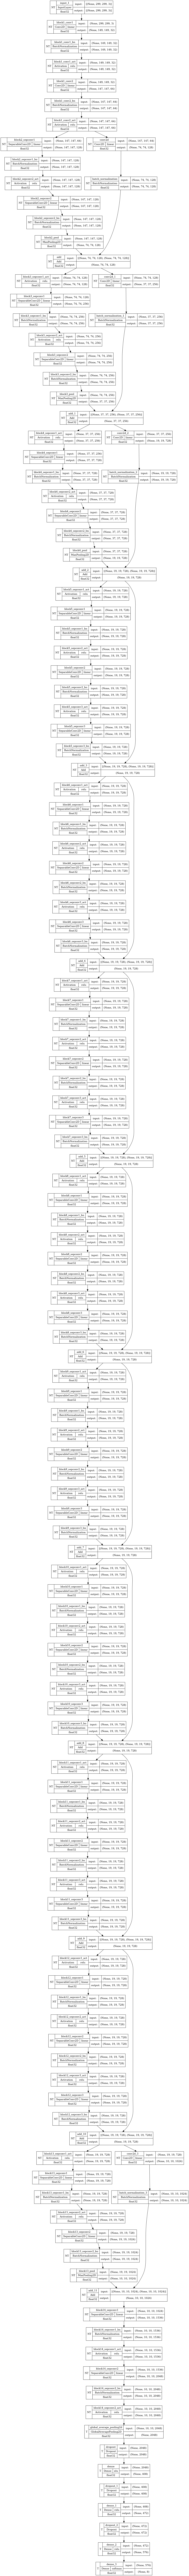

In [21]:
model_name='xception.png'
keras.utils.plot_model(cnn, to_file=model_name, show_shapes=True, show_dtype=True, show_layer_names=True, expand_nested=True, dpi=96, show_layer_activations=True, show_trainable=True, rankdir='TB')

Results

* Training and Validation

In [22]:
cnn.fit(X_train,y_train,epochs=epochs,validation_split=0.2)

Epoch 1/100
90/90 [==============================] - 21s 207ms/step - loss: 0.2085 - accuracy: 0.9312 - val_loss: 0.0742 - val_accuracy: 0.9778
Epoch 2/100
90/90 [==============================] - 17s 194ms/step - loss: 0.1650 - accuracy: 0.9434 - val_loss: 0.0751 - val_accuracy: 0.9764
Epoch 3/100
90/90 [==============================] - 17s 195ms/step - loss: 0.1941 - accuracy: 0.9316 - val_loss: 0.1051 - val_accuracy: 0.9667
Epoch 4/100
90/90 [==============================] - 17s 195ms/step - loss: 0.1513 - accuracy: 0.9472 - val_loss: 0.0523 - val_accuracy: 0.9833
Epoch 5/100
90/90 [==============================] - 17s 194ms/step - loss: 0.1652 - accuracy: 0.9462 - val_loss: 0.0545 - val_accuracy: 0.9819
Epoch 6/100
90/90 [==============================] - 16s 173ms/step - loss: 0.1277 - accuracy: 0.9556 - val_loss: 0.0648 - val_accuracy: 0.9806
Epoch 7/100
90/90 [==============================] - 17s 194ms/step - loss: 0.1517 - accuracy: 0.9455 - val_loss: 0.0772 - val_accuracy:

* Graphical Results for Training and Validation

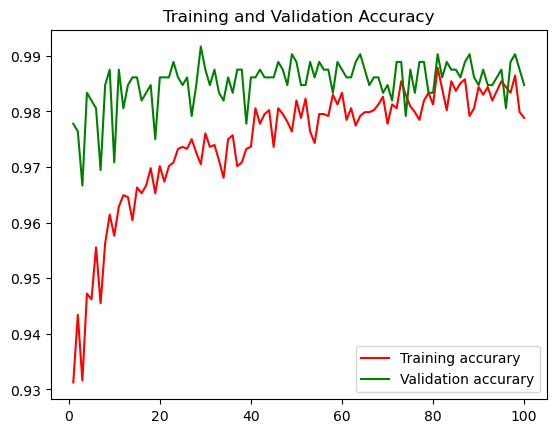

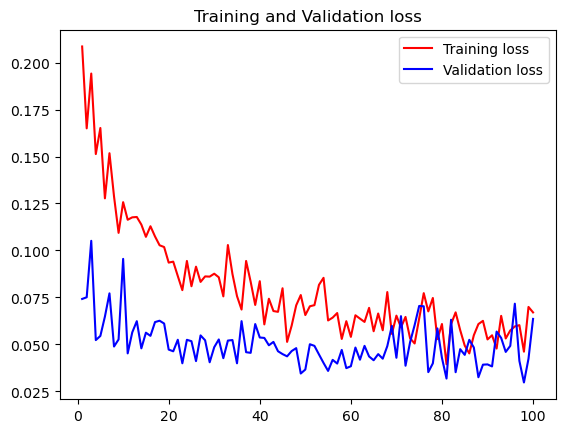

In [23]:
acc=cnn.history.history['accuracy']
val_acc=cnn.history.history['val_accuracy']
loss=cnn.history.history['loss']
val_loss=cnn.history.history['val_loss']
epochs=range(1,len(acc)+1)
plt.plot(epochs,acc,'r',label='Training accurary')
plt.plot(epochs,val_acc,'g',label='Validation accurary')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()
plt.plot(epochs,loss,'r',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()

* Testing

In [24]:
y_probability= cnn.predict(X_test)
y_predict=pd.get_dummies(np.argmax(y_probability,axis=1))

13/13 [==============================] - 2s 133ms/step


In [25]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, classification_report, multilabel_confusion_matrix

print('The classification test results are : \n')
print(classification_report(y_test,y_predict))
print('Confusion Matrix :')
cm=multilabel_confusion_matrix(y_test,y_predict)
print(cm)
print('\n')
print('The test accuracy percentage is :')
print((accuracy_score(y_test,y_predict))*100)
print('\n')
print('The test precision percentage is :')
print((precision_score(y_test,y_predict,average='micro'))*100)
print('\n')
print('The test recall percentage is :')
print((recall_score(y_test,y_predict,average='micro'))*100)
print('\n')
print('The test f1 percentage is :')
print((f1_score(y_test,y_predict,average='micro'))*100)
print('\n')
print('The test ROC AUC percentage is :')
print((roc_auc_score(y_test,y_predict,average='micro'))*100)

The classification test results are : 

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        50
           1       1.00      0.92      0.96        50
           2       1.00      1.00      1.00        50
           3       0.98      1.00      0.99        50
           4       1.00      1.00      1.00        50
           5       1.00      0.98      0.99        50
           6       1.00      1.00      1.00        50
           7       0.96      1.00      0.98        50

   micro avg       0.99      0.99      0.99       400
   macro avg       0.99      0.99      0.99       400
weighted avg       0.99      0.99      0.99       400
 samples avg       0.99      0.99      0.99       400

Confusion Matrix :
[[[348   2]
  [  0  50]]

 [[350   0]
  [  4  46]]

 [[350   0]
  [  0  50]]

 [[349   1]
  [  0  50]]

 [[350   0]
  [  0  50]]

 [[350   0]
  [  1  49]]

 [[350   0]
  [  0  50]]

 [[348   2]
  [  0  50]]]


The test accuracy percenta